# Assignment EDA

In [198]:
import pandas as pd
import csv
from util import bar_plot

In [54]:
data = pd.read_csv('bank-full.csv', sep='\;', engine='python', quoting=csv.QUOTE_NONE)

In [55]:
data.head()

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""


In [116]:
data.shape

(45211, 17)

In [71]:
data.columns = [col.replace('"', '') for col in data.columns]

In [69]:
for i, col in enumerate(data.columns):
    data.iloc[:, i] = data.iloc[:, i].apply(lambda s: s.replace('"', '') if isinstance(s, str) else s)

In [72]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [117]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
datetime = ['day', 'month']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
target = ['y']

In [118]:
len(numerical_columns+datetime+categorical+target)

17

In [75]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [227]:
data['age'] = data['age'].astype('int')

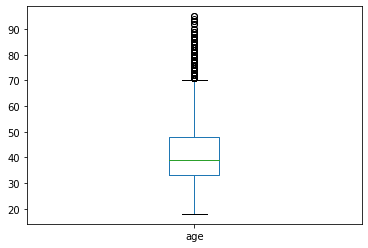

In [228]:
data.age.plot(kind='box')

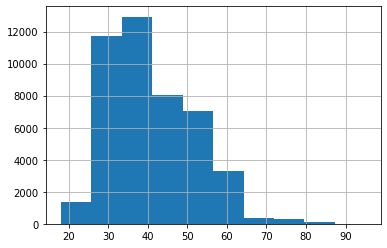

In [78]:
data.age.hist()

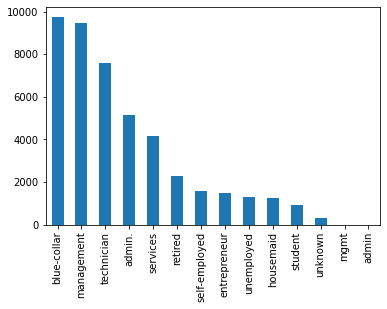

In [91]:
data.job.value_counts().plot(kind='bar')

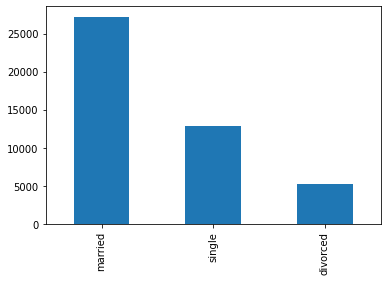

In [90]:
data.marital.value_counts().plot(kind='bar')

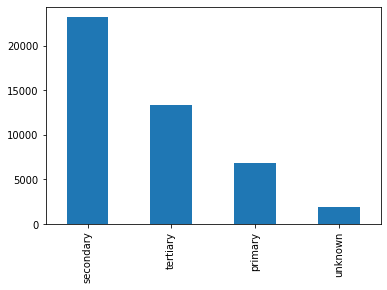

In [89]:
data.education.value_counts().plot(kind='bar')

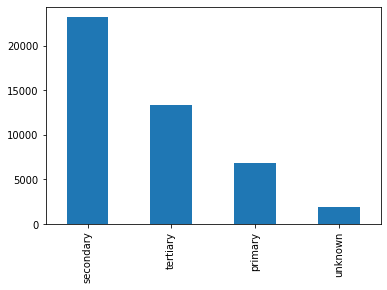

In [86]:
data.education.value_counts().plot(kind='bar')

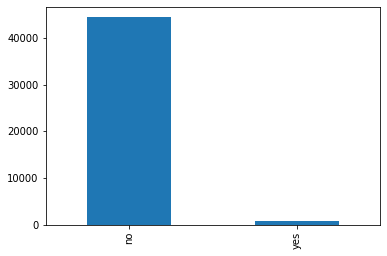

In [92]:
data.default.value_counts().plot(kind='bar')

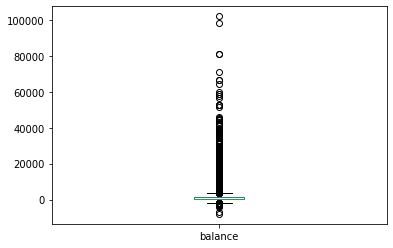

In [230]:
data.balance.plot(kind='box')

In [ ]:
data

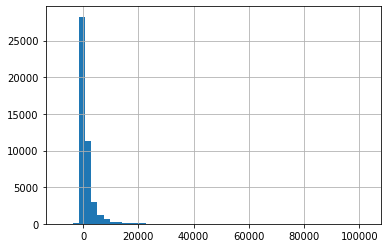

In [151]:
data.balance.hist(bins=50)

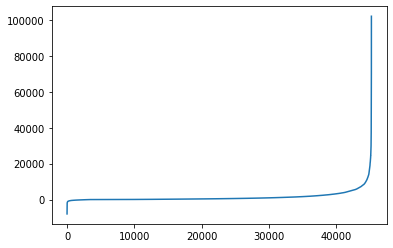

In [97]:
data.balance.sort_values().reset_index(drop=True).plot()

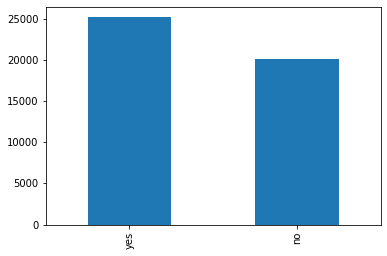

In [98]:
data.housing.value_counts().plot(kind='bar')

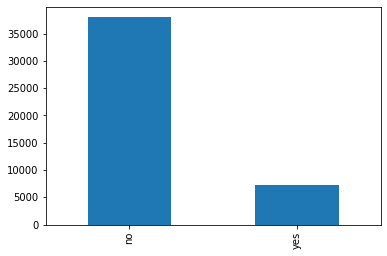

In [99]:
data.loan.value_counts().plot(kind='bar')

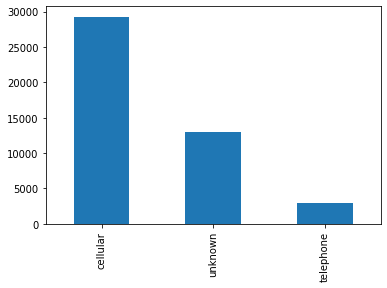

In [100]:
data.contact.value_counts().plot(kind='bar')

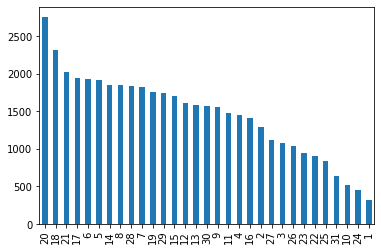

In [101]:
data.day.value_counts().plot(kind='bar')

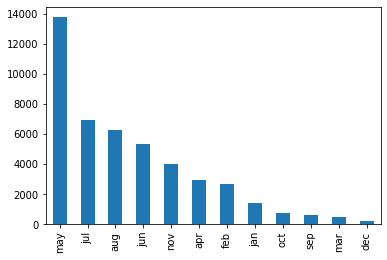

In [102]:
data.month.value_counts().plot(kind='bar')

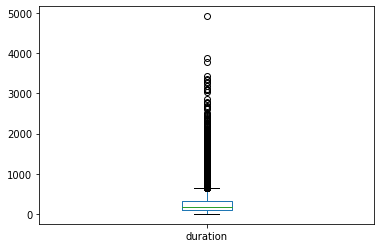

In [231]:
data.duration.plot(kind='box')

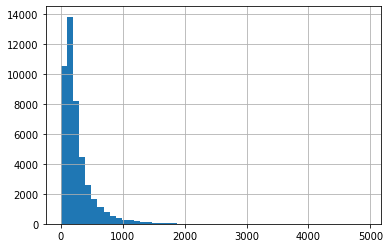

In [105]:
data.duration.hist(bins=50)

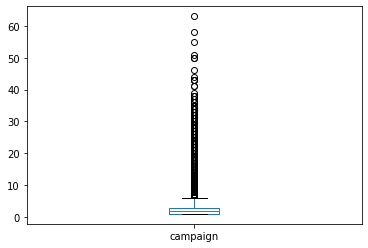

In [232]:
data.campaign.plot(kind='box')

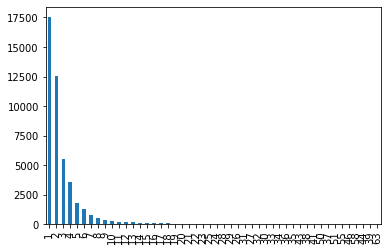

In [107]:
data.campaign.value_counts().plot(kind='bar')

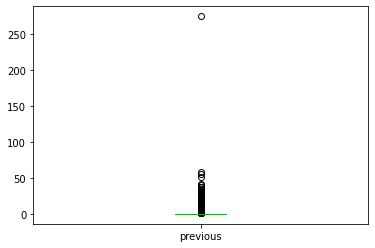

In [233]:
data.previous.plot(kind='box')

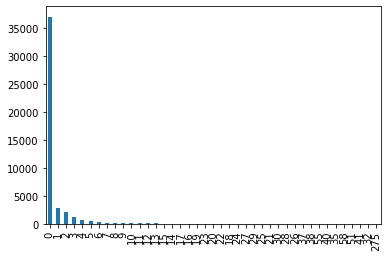

In [108]:
data.previous.value_counts().plot(kind='bar')

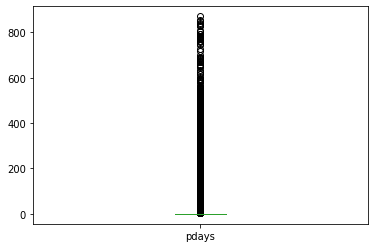

In [234]:
data.pdays.plot(kind='box')

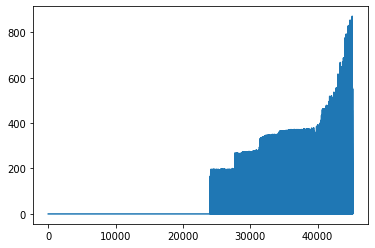

In [112]:
data.pdays.plot()

In [235]:
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

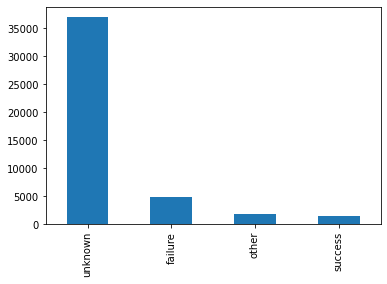

In [109]:
data.poutcome.value_counts().plot(kind='bar')

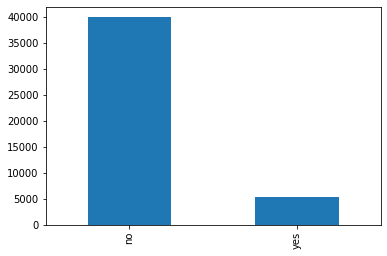

In [113]:
data.y.value_counts().plot(kind='bar')

In [133]:
data[numerical_columns].corr()

,balance,duration,campaign,pdays,previous
balance,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.016674,0.001203,-0.032855,0.454820,1.000000


In [121]:
from seaborn import pairplot

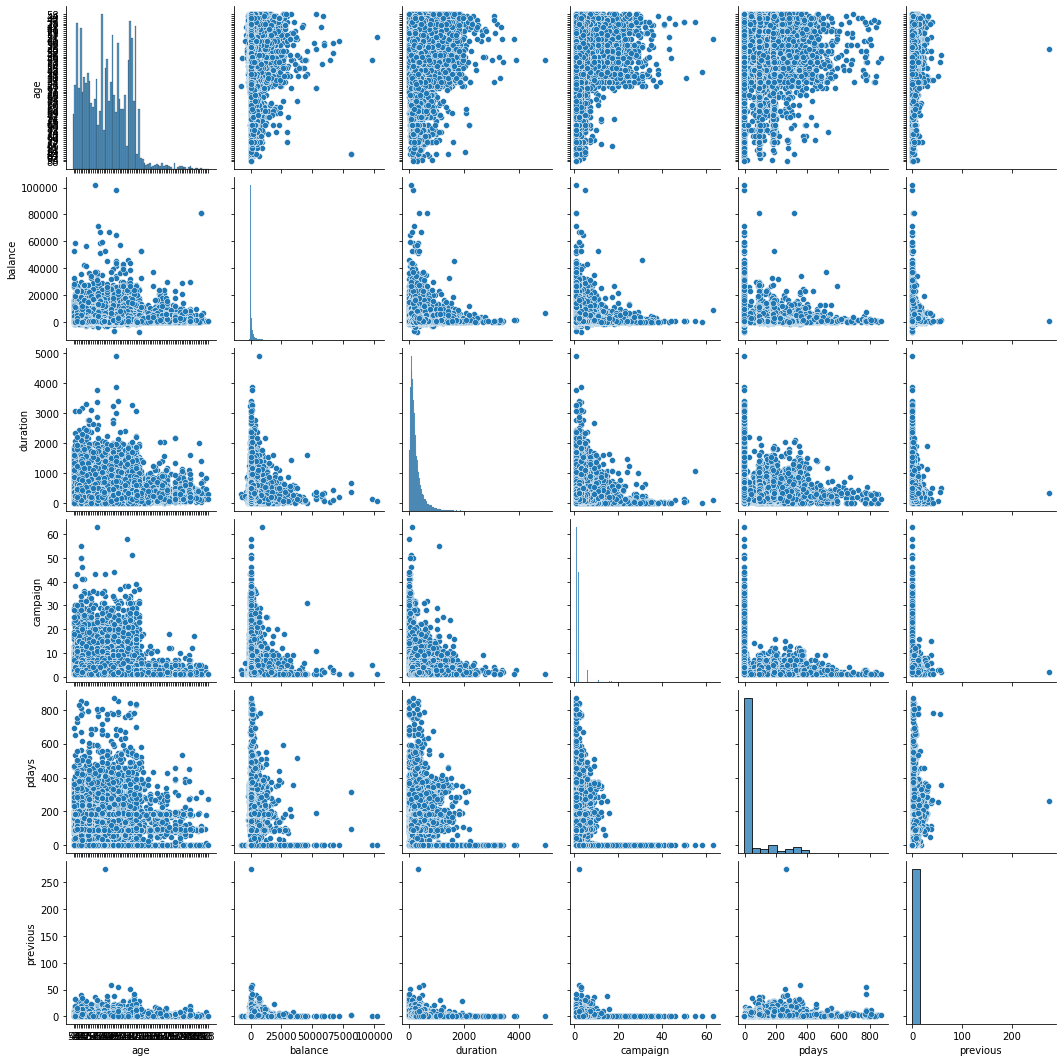

In [122]:
pairplot(data, vars=numerical_columns)

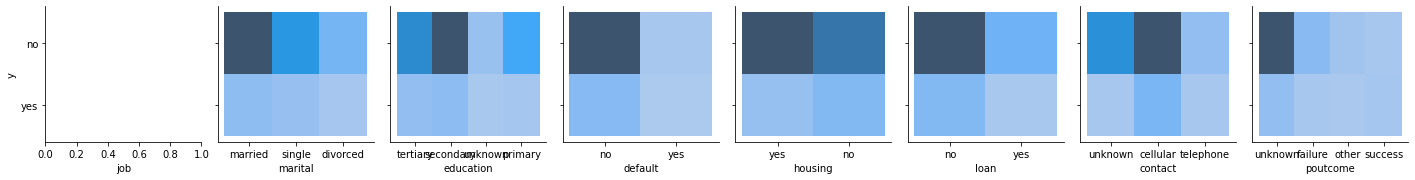

In [177]:
#pairplot(data, x_vars = 'y', y_vars = numerical_columns)
pairplot(data, x_vars = categorical, y_vars = 'y', kind='hist')

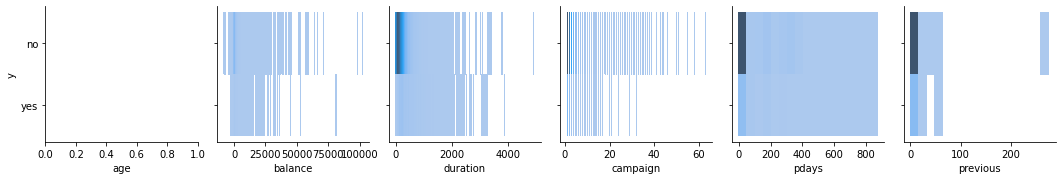

In [178]:
pairplot(data, x_vars = numerical_columns, y_vars = 'y', kind='hist')

In [167]:
import re
data['job'] = data['job'].apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))
data['job'] = data['job'].apply(lambda x: 'unknown' if x == 'mgmt' else x)

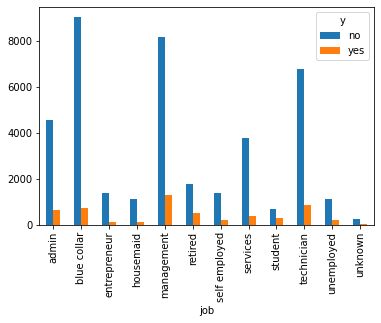

In [214]:
pd.crosstab(data['job'], data['y']).plot(kind = 'bar')

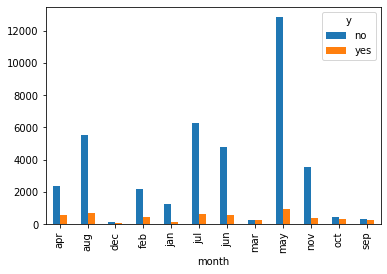

In [213]:
pd.crosstab(data['month'], data['y']).plot(kind='bar')

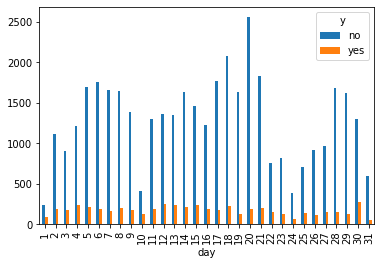

In [212]:
pd.crosstab(data['day'], data['y']).plot(kind='bar')

In [225]:
def barplot_with_y(data, col):
    tmp = pd.crosstab(data[col], data['y']).reset_index(drop=True)
    tmp['ratio'] = tmp['yes']/(tmp['yes']+tmp['no'])
    tmp['ratio'] = tmp['ratio']*tmp['no'].max()
    return tmp.plot(kind='bar')

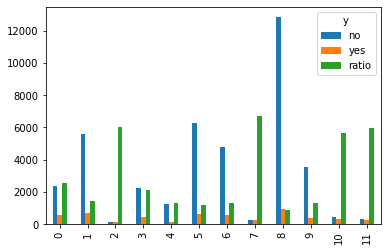

In [226]:
barplot_with_y(data, 'month')

In [249]:
count = 0

duration


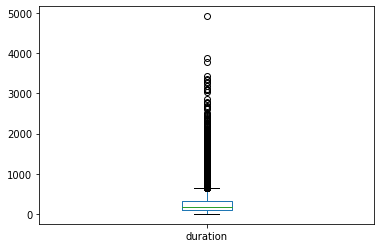

In [252]:
col = numerical_columns[count]
data[col].plot(kind='box')
print(col)
count+=1